<a href="https://colab.research.google.com/github/salmankhaliq22/MachineLearning-Templates/blob/main/RFE_Classification_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFE for Classification

In [1]:
# test classification dataset
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples = 2000, n_features = 20, n_informative = 8, n_redundant = 12, random_state = 22)

# summarize the dataset
print(X.shape, y.shape)

(2000, 20) (2000,)


In [7]:
# evaluate RFE for Classification
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 8)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps = [('s', rfe), ('m', model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 22)
n_scores = cross_val_score(pipeline, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.816 (0.023)


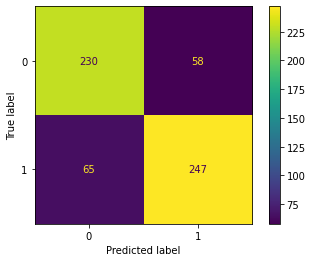

In [14]:
# make a prediction with an RFE pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

# create pipeline
rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 8)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps = [('s', rfe), ('m', model)])

# fit the model on all available data
pipeline.fit(X_train, y_train)

# make a prediction for test data
y_pred = pipeline.predict(X_test)

# evaluating performance
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()



[Reference](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py)

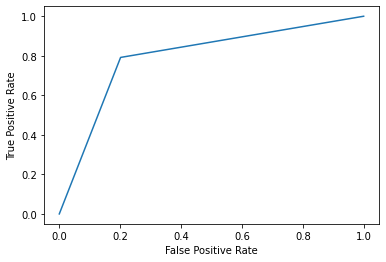

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=pipeline.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

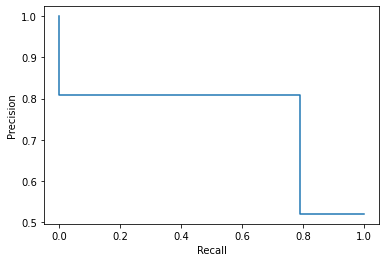

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=pipeline.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

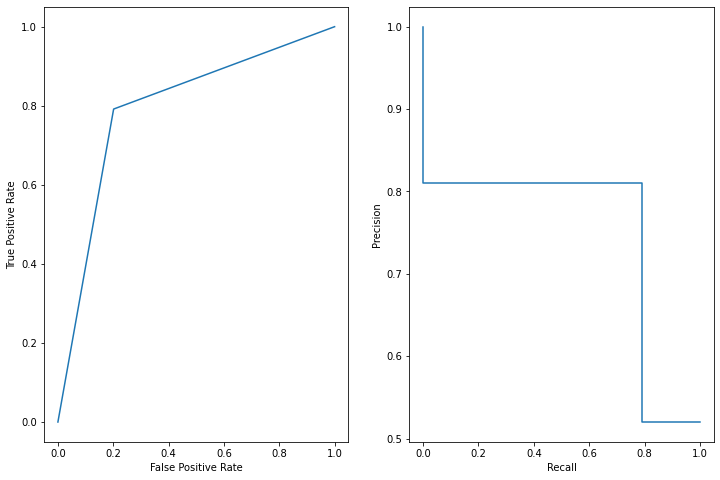

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

# Load Data and train model

For this example, we load a blood transfusion service center data set from OpenML <https://www.openml.org/d/1464>. This is a binary classification problem where the target is whether an individual donated blood. Then the data is split into a train and test dataset and a logistic regression is fitted with the train dataset.